In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [84]:
# load and read the data
housing = pd.read_csv("train.csv")
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Inspecting the Dataframe

In [85]:
# check the data type of all the columns
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [86]:
# check the no of rows and column
housing.shape

(1460, 81)

In [87]:
# check the numeric columns
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Step 3: Data Preparation

#### check the missing value percentage in each columns -

In [88]:
#Check missing values percentage in all the columns of application data
all_columns = (housing.isnull().sum()/len(housing)*100).reset_index()
all_columns.rename(columns = {'index':'Missing Columns', 0:'Missing Values'}, inplace=True)
all_columns.sort_values(by='Missing Values',ascending=False, inplace = True)

In [89]:
all_columns

,Missing Columns,Missing Values
72,PoolQC,99.520548
74,MiscFeature,96.301370
6,Alley,93.767123
73,Fence,80.753425
57,FireplaceQu,47.260274
...,...,...
27,ExterQual,0.000000
24,Exterior2nd,0.000000
23,Exterior1st,0.000000
22,RoofMatl,0.000000


In [90]:
#Store the above data into dataframe for missing values >50% 
missing_column = list(all_columns[all_columns['Missing Values'] > 50]['Missing Columns'])

In [91]:
len(missing_column)

4

In [92]:
# Drop all 5 columns from housing data having more than 50% missing values
housing.drop(missing_column, axis=1, inplace = True)

In [93]:
#check the shape of housing data after droping all the columns having more than 50% missing values.
housing.shape

(1460, 77)

##### check the categorical columns again and impute for missing values

In [94]:
housing.select_dtypes(include='object').isnull().sum()[housing.select_dtypes(include='object').isnull().sum()>0]

MasVnrType        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [95]:
# Replace Null values with None in the following columns below : 

for col in ('MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical','FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    
    housing[col]=housing[col].fillna('None')

#### Remove categorical attributes that have more than 90% data associated to one value.

    - We will remove any column that has one value repeating 1310 times (131/1450)*100 = 90%) as this column would be skewed to one value

In [96]:
# Drop the following columns that have more than 85% values associated to a specific value

# Method to get the column names that have count of one value more than 85%

def getHighCategoricalValueCounts():
    column = []
    categorical_columns = housing.select_dtypes(include=['object'])
    for col in (categorical_columns):
        if(housing[col].value_counts().max() >= 1310):
            column.append(col)
    return column

columnsToBeRemoved = getHighCategoricalValueCounts()

# Remove the columns with skewed data

housing.drop(columnsToBeRemoved, axis = 1, inplace = True)

housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,Norm,1Fam,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,Feedr,1Fam,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,Norm,1Fam,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,Norm,1Fam,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,Norm,1Fam,...,0,0,0,0,0,12,2008,WD,Normal,250000


#### check categorical columns having value as 'NA'

In [97]:
# Check all the columns with having value as 'NA'
housing.columns[housing.isin(['NA']).any()]

Index([], dtype='object')

Though in data dictionary few column has described having value as NA but in actual data there is no columns having value as NA

#### There are few columns in housing data which has less than 5% values in particular column, we will merge all those values into new category as 'OTHERS'

In [98]:
def condense_category(col, min_freq=0.05, new_name='other'):
    series = pd.value_counts(col)
    mask = (series/series.sum()).lt(min_freq)
    return pd.Series(np.where(col.isin(series[mask].index), new_name, col))

In [99]:
housing[housing.select_dtypes(include='object').columns] = housing.select_dtypes(include='object').apply(condense_category, axis=0)

In [100]:
# once again check for null values in all categorical columns

housing.select_dtypes(include='object').isnull().sum()[housing.select_dtypes(include='object').isnull().sum()>0]

Series([], dtype: int64)

No more null values in the categorical variables 

#### Check the numeric column and handle the missing values.

In [101]:
housing.select_dtypes(include=['int64','float']).isnull().sum()[housing.select_dtypes(include=['int64','float']).isnull()
                                                                  .sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [102]:
# Impute the null values with median values for LotFrontage and MasVnrArea columns

housing['LotFrontage'] = housing['LotFrontage'].replace(np.nan, housing['LotFrontage'].median())
housing['MasVnrArea'] = housing['MasVnrArea'].replace(np.nan, housing['MasVnrArea'].median())
housing['GarageYrBlt'] = housing['GarageYrBlt'].replace(np.nan, housing['GarageYrBlt'].median())

In [103]:
# check the missing value again

housing.select_dtypes(include=['int64','float']).isnull().sum()[housing.select_dtypes(include=['int64','float']).isnull()
                                                                  .sum()>0]

Series([], dtype: int64)

#### Handle the year column

We will impute the `YearBuilt` column by substracting the value from current date (i.e. 2020) and add a new column as HouseAge. After imputing we will drop `YearBuilt` and other year columns like (`GarageYrBlt`, `YearRemodAdd` and `YrSold`)


In [104]:
housing['HouseAge'] = 2020 - housing['YearBuilt']

In [105]:
# drop all other year columns

housing.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

#### Remove all continuous attributes that have more than 90% data associated to one value.

    - We will remove any column that has one value repeating 1241 times (1241/1450)*100 = 85%) as this column would be skewed to one value

In [106]:
# Drop the following columns that have more than 90% values associated to a specific value
# We will also drop MoSold as we will not be using that for further analysis

def getHighNumericalValueCounts():
    column = []
    numerical_columns = housing.select_dtypes(include=['int64', 'float'])
    for col in (numerical_columns):
        if(housing[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighNumericalValueCounts()
housing.drop(columnsToBeRemoved, axis = 1, inplace = True)

housing.drop(['MoSold'], axis = 1, inplace = True)

housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,...,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice,HouseAge
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,Norm,1Fam,...,Attchd,RFn,2,548,0,61,WD,Normal,208500,17
1,2,20,RL,80.0,9600,Reg,other,other,Feedr,1Fam,...,Attchd,RFn,2,460,298,0,WD,Normal,181500,44
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,Norm,1Fam,...,Attchd,RFn,2,608,0,42,WD,Normal,223500,19
3,4,70,RL,60.0,9550,IR1,Corner,other,Norm,1Fam,...,Detchd,Unf,3,642,0,35,WD,Abnorml,140000,105
4,5,60,RL,84.0,14260,IR1,other,other,Norm,1Fam,...,Attchd,RFn,3,836,192,84,WD,Normal,250000,20


In [107]:
# check for percentage of null values in each column

percent_missing = round(100*(housing.isnull().sum()/len(housing.index)), 2)
print(percent_missing)

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
LotShape         0.0
LotConfig        0.0
Neighborhood     0.0
Condition1       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
RoofStyle        0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
HeatingQC        0.0
1stFlrSF         0.0
2ndFlrSF         0.0
GrLivArea        0.0
BsmtFullBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
KitchenQual      0.0
TotRmsAbvGrd     0.0
Fireplaces       0.0
FireplaceQu      0.0
GarageType       0.0
GarageFinish     0.0
GarageCars       0.0
GarageArea       0.0
WoodDeckSF       0.0
OpenPorchSF      0.0
SaleType         0.0
SaleCondition

There are no null values in the dataset

#### Check for Duplicates

In [108]:
# Check if there are any duplicate values in the dataset

housing[housing.duplicated(keep=False)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,...,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice,HouseAge


There are no duplicate is the dataset

#### Outlier Analysis

- Here in our analysis to find out the outliers, we have considered continuous columns and analyzed the statistics of them.

In [109]:
# Checking outliers at 25%,50%,75%,90%,95% and above

housing.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,HouseAge
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,567.240411,1057.429452,...,0.382877,2.866438,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,180921.195890,48.732192
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,441.866955,438.705324,...,0.502885,0.815778,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,79442.502883,30.202904
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,10.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,223.000000,795.750000,...,0.000000,2.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,129975.000000,20.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,477.500000,991.500000,...,0.000000,3.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,163000.000000,47.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,808.000000,1298.250000,...,1.000000,3.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,214000.000000,66.000000
90%,1314.100000,120.000000,92.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,1232.000000,1602.200000,...,1.000000,4.000000,9.000000,1.000000,3.000000,757.100000,262.000000,130.000000,278000.000000,95.100000
95%,1387.050000,160.000000,104.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,1468.000000,1753.000000,...,1.000000,4.000000,10.000000,2.000000,3.000000,850.100000,335.000000,175.050000,326100.000000,104.000000
99%,1445.410000,190.000000,137.410000,37567.640000,10.000000,9.000000,791.280000,1572.410000,1797.050000,2155.050000,...,1.000000,5.000000,11.000000,2.000000,3.000000,1002.790000,505.460000,285.820000,442567.010000,120.820000


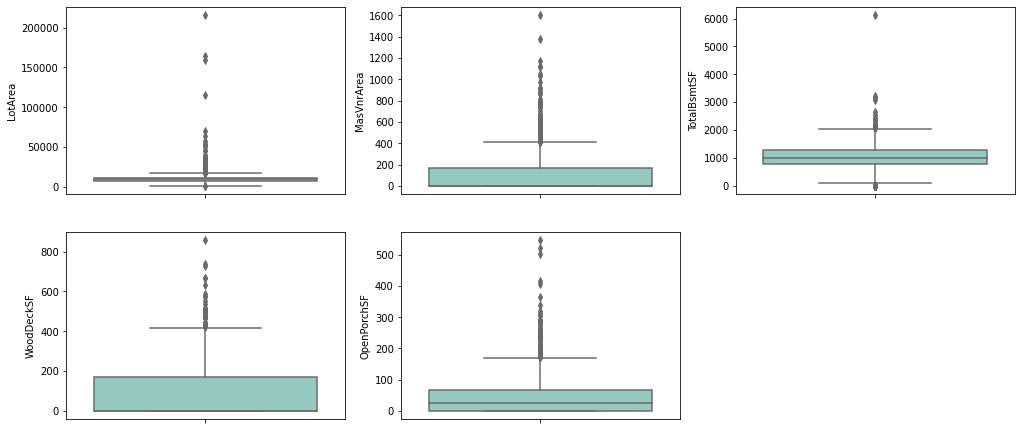

In [110]:
# Check the outliers in all the numeric columns

plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', palette='Set3', data = housing)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', palette='Set3', data = housing)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', palette='Set3', data = housing)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data = housing)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = housing)
plt.show()

In [111]:
# Removing Outliers

# Removing values beyond 98% for LotArea

nn_quartile_LotArea = housing['LotArea'].quantile(0.98)
housing = housing[housing["LotArea"] < nn_quartile_LotArea]

# Removing values beyond 98% for MasVnrArea

nn_quartile_MasVnrArea = housing['MasVnrArea'].quantile(0.98)
housing = housing[housing["MasVnrArea"] < nn_quartile_MasVnrArea]

# Removing values beyond 99% for TotalBsmtSF

nn_quartile_TotalBsmtSF = housing['TotalBsmtSF'].quantile(0.99)
housing = housing[housing["TotalBsmtSF"] < nn_quartile_TotalBsmtSF]

# Removing values beyond 99% for WoodDeckSF

nn_quartile_WoodDeckSF = housing['WoodDeckSF'].quantile(0.99)
housing = housing[housing["WoodDeckSF"] < nn_quartile_WoodDeckSF]

# Removing values beyond 99% for OpenPorchSF

nn_quartile_OpenPorchSF = housing['OpenPorchSF'].quantile(0.99)
housing = housing[housing["OpenPorchSF"] < nn_quartile_OpenPorchSF]

In [112]:
# Determine the percentage of data retained

num_data = round(100*(len(housing)/1460),2)
print(num_data)

93.01


## Step 3: Data Visualization 

Data is clean now but before moving to prepare data for Model building, we will do some Exploratory data analysis to know the type of data present in dataset.

### Univariate Analysis - Categorical

In [113]:
# first we will check all categorical column in dataset
housing.select_dtypes(include=['object']).columns.tolist()

['MSZoning',
 'LotShape',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'SaleType',
 'SaleCondition']

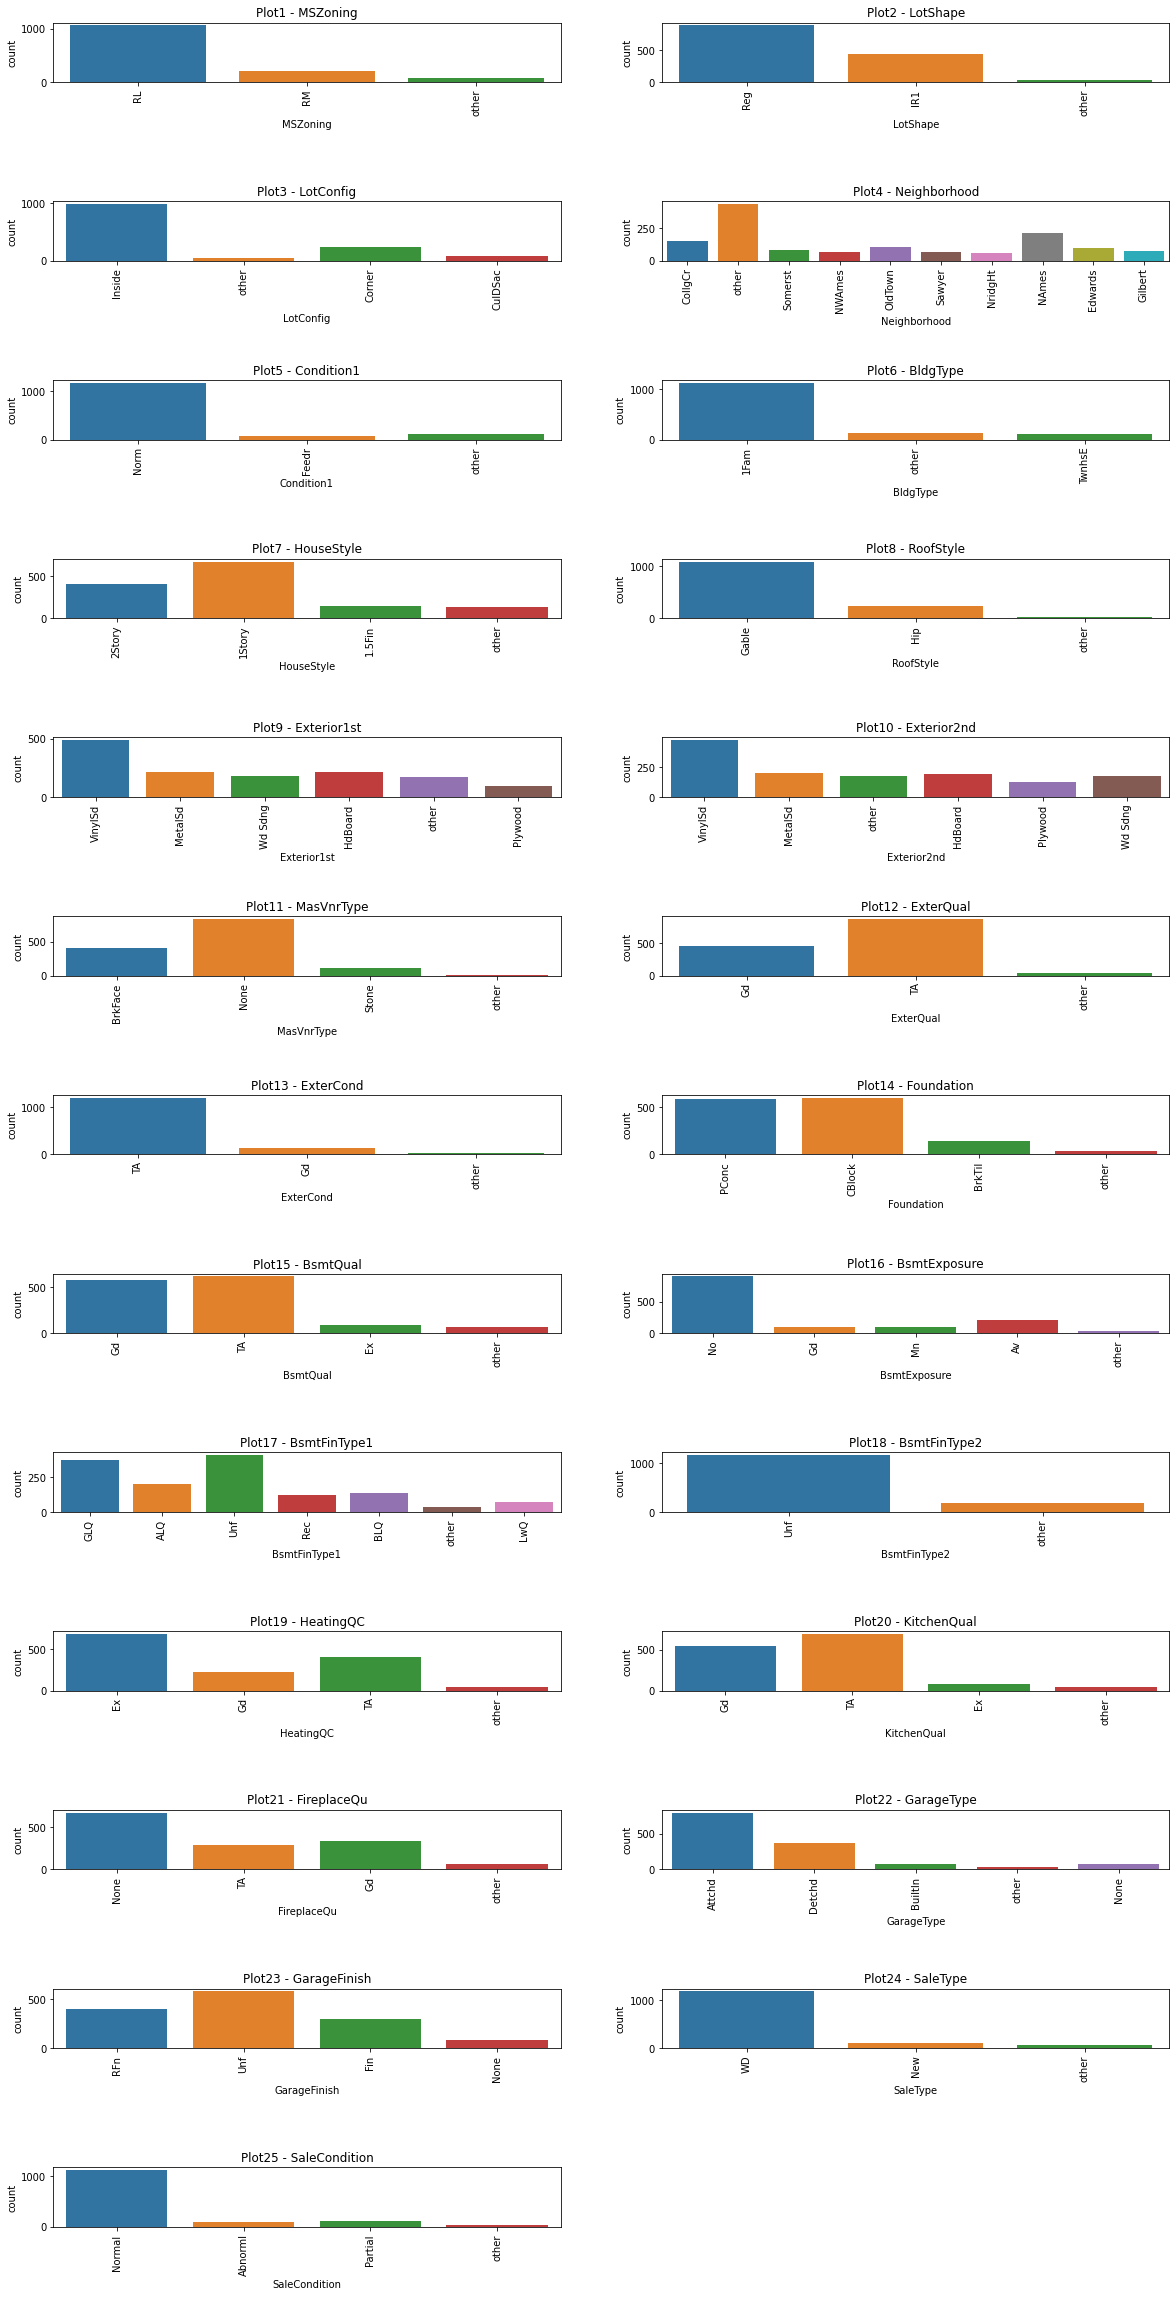

In [114]:
cat_cols = ['MSZoning',
 'LotShape',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'SaleType',
 'SaleCondition']
rowCnt = len(cat_cols)
colCnt = 2
subCnt = 1 # initialize plot number

plt.figure(figsize = (20,80))
for col in cat_cols:
    plt.subplot(rowCnt, colCnt, subCnt)
    sns.countplot(housing[col])
    plt.title("Plot"+  str(subCnt)+ ' - ' + col )
    plt.xticks(rotation=90)
    plt.subplots_adjust(hspace = 2.0)
    subCnt = subCnt+1

###### Insights of each plots draw above:

###### 1. MSZoning
- Residential Low Density houses are far more than any other types of houses.

###### 2. LotShape
- Most hosuses are Regular shape while few have Irregular shape too.  

###### 3. LotConfig
- Most hosuses has inside lot while few has Corner and Cul-de-sac lot too.

###### 4. Neighborhood
- Most hosuses has physical location at North Ames &  College Creek.

###### 5. Condition1
- More than 70% houses has proximity as normal.

###### 6. BldgType
- More than 70% houses has dwelling type as  single-family Detached.

###### 7. HouseStyle
- Most of the houses are 1 storey and 2nd most preferred house is 2 storey.

###### 8. RoofStyle
- More than 70% houses has roof type as Gable.

###### 9. Exterior1st
- Most houses has Vinyl Siding as exterior cover.

###### 10. Exterior2nd
- Most houses has Vinyl Siding as 2nd exterior cover too.

###### 11. MasVnrType
- Brick Common is the most common type of Masonry veneer.

###### 12. ExterQual
- Average/Typical is the most common type of external material.  

###### 13. ExterCond
- Average/Typical is the most common type of external material condition.

###### 14. Foundation
- Poured Contrete and Cinder Block are the most common type of foundation in most of the houses.

###### 15. BsmtQual
- Good (90-99 inches) and TA	Typical (80-89 inches) are the height of basement in most of the houses.

###### 16. BsmtExposure
- most of the house has No Exposure of garden level walls.

###### 17. BsmtFinType1
- Good Living Quarters and Unfinshed are the Rating of basement finished area in houses.

###### 18. BsmtFinType2
- Unfinshed is the Rating of basement finished area in houses(if has multiple).

###### 19. HeatingQc
- More than 70% houses has Heating quality and condition as excellent. 

###### 20. KitchenQual
- Most of the houses as Kitchen quality as Average/Typical.

###### 21. FirePlaceQc
- Most of the houses as fireplace quality as good.

###### 22. GarageType
- most of the house has garage Attached to home.

###### 23. GarageFinish
- most of the house has Unfinished garage.

###### 24. SaleType
- Warranty Deed is the most common type of sale in all the houses.

###### 25. SaleCondition
- More than 70% houses has sale condition as Normal.


### Univariate Analysis - Continuous

In [115]:
#Check all continuous column in dataset
housing.select_dtypes(include=['int64','float64']).columns.tolist()

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'SalePrice',
 'HouseAge']

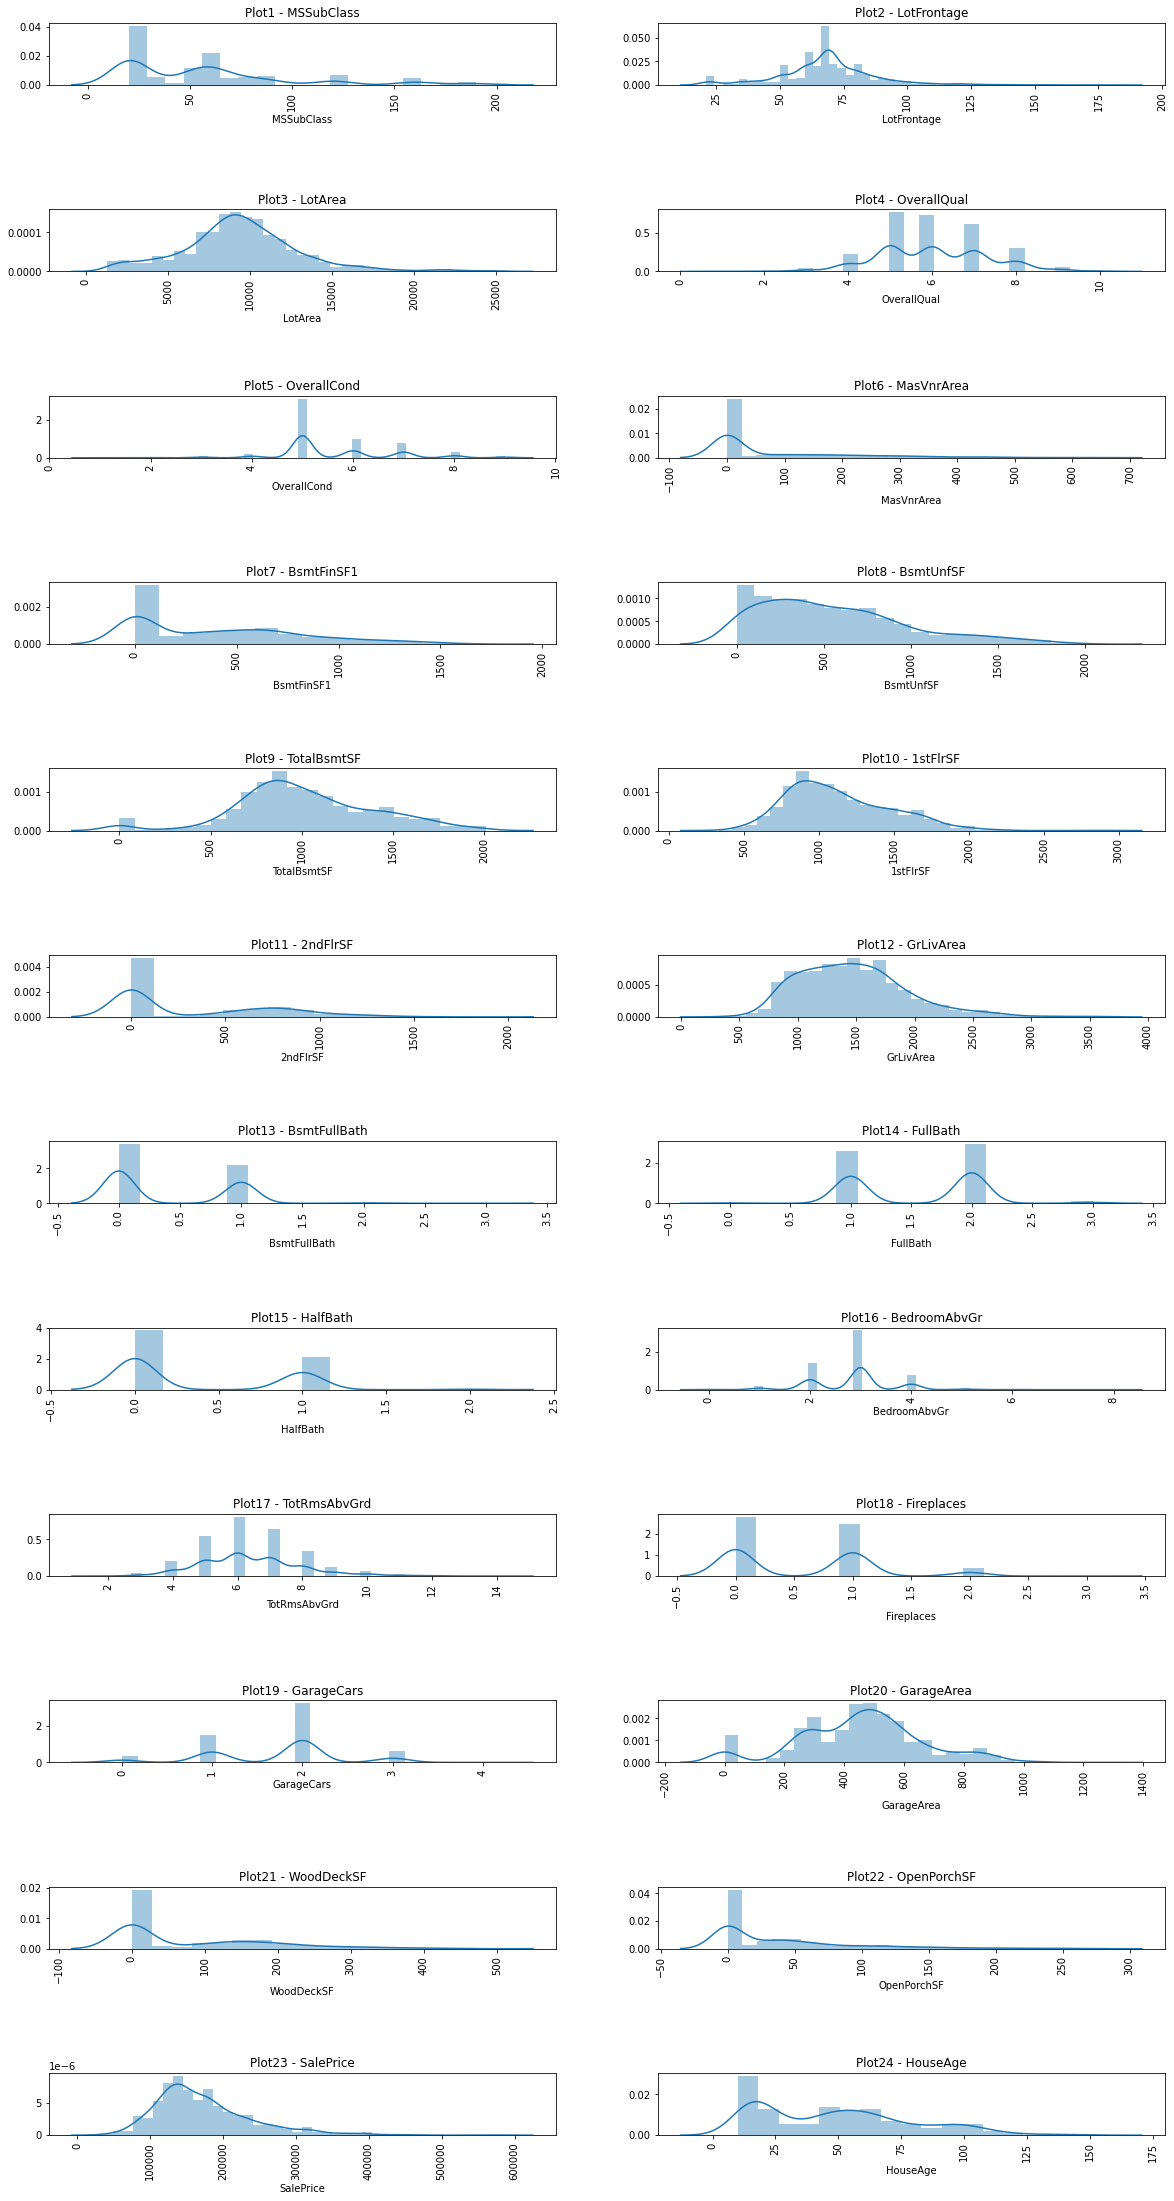

In [116]:
cat_cols = ['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'SalePrice',
 'HouseAge']
rowCnt = len(cat_cols)
colCnt = 2
subCnt = 1 # initialize plot number

plt.figure(figsize = (20,80))
for col in cat_cols:
    plt.subplot(rowCnt, colCnt, subCnt)
    sns.distplot(housing[col])
    plt.title("Plot"+  str(subCnt)+ ' - ' + col )
    plt.xticks(rotation=90)
    plt.subplots_adjust(hspace = 2.0)
    subCnt = subCnt+1

###### Insights of each plots draw above:

###### 1. MSSubClass
-  Most of the houses has dwilling type as 1-STORY 1946 & NEWER ALL STYLES & 2-STORY 1946 & NEWER 

###### 2. LotFrontage
- Most hosuses has 50ft street connected to property

###### 3. LotArea
- Most hosuses has lotarea of 9000 sq ft.

###### 4. OverallQual
- Overall material and finish of the houses are Very Good, Good, Above Average and Average

###### 5. OverallCond
- Most of the houses has overall condition as average.  

###### 6. MasVnrArea
- Most of the houses has average 10sq ft Masonry veneer area.

###### 7. BsmtFinSF1
- Most of the houses has 0-500 sq ft finished basement area.

###### 8. BsmtUnfSF
- - Most of the houses has 0-1000 sq ft unfinished basement area.

###### 9. TotalBsmtSF
- Total basement area of houses vary from 500 to 1500 sq ft.

###### 10. 1stFlrSF
- Total first floor area of houses vary from 500 to 2000 sq ft.

###### 11. 2ndFlrSF
- Total second floor area of houses vary from 0 to 300 sq ft and 500 to 1000 sq ft.

###### 12. GrLivArea
- Total above ground area of houses vary from 500 to 3000 sq ft.

###### 13. BsmtFullBath
- Most of the houses have either 0 bathroom or 1 bathroom in basement.

###### 14. FullBath
- Most of the houses have either 1 bathroom or 2 bathroom above ground.

###### 15. HalfBath
- Most of the houses have either 0 bathroom or 1 bathroom above ground.

###### 16. BedroomAbvGr
- Most of the houses have 2, 3 and 4 bedrooms above ground.

###### 17. TotRmsAbvGrd
- Total rooms above ground varries from 4-10.

###### 18. Fireplaces
- Most of the houses have either 0 or 1 fireplace.

###### 19. GarageCars
- Garrage in houses has car capacity as 1, 2 or 3.

###### 20. GarageArea
- Total garage area of houses vary from 100 to 1000 sq ft.

###### 21. WoodDeckSF
- Most of the houses do not have wood deck area while few has wooddesk area from 100-300 sq ft.

###### 22. OpenPorchSF
- Most of the houses do not have open porch area while few has open porch area from 0-100 sq ft.

###### 23. SalePrice
- Sale price of houses vary from 100000 to 300000

###### 24. HouseAge
- Most of the houses have age less than 25 years while few houses have age from 50 to 100 years too.


### Bivariate Analysis: Categorical - Continuous

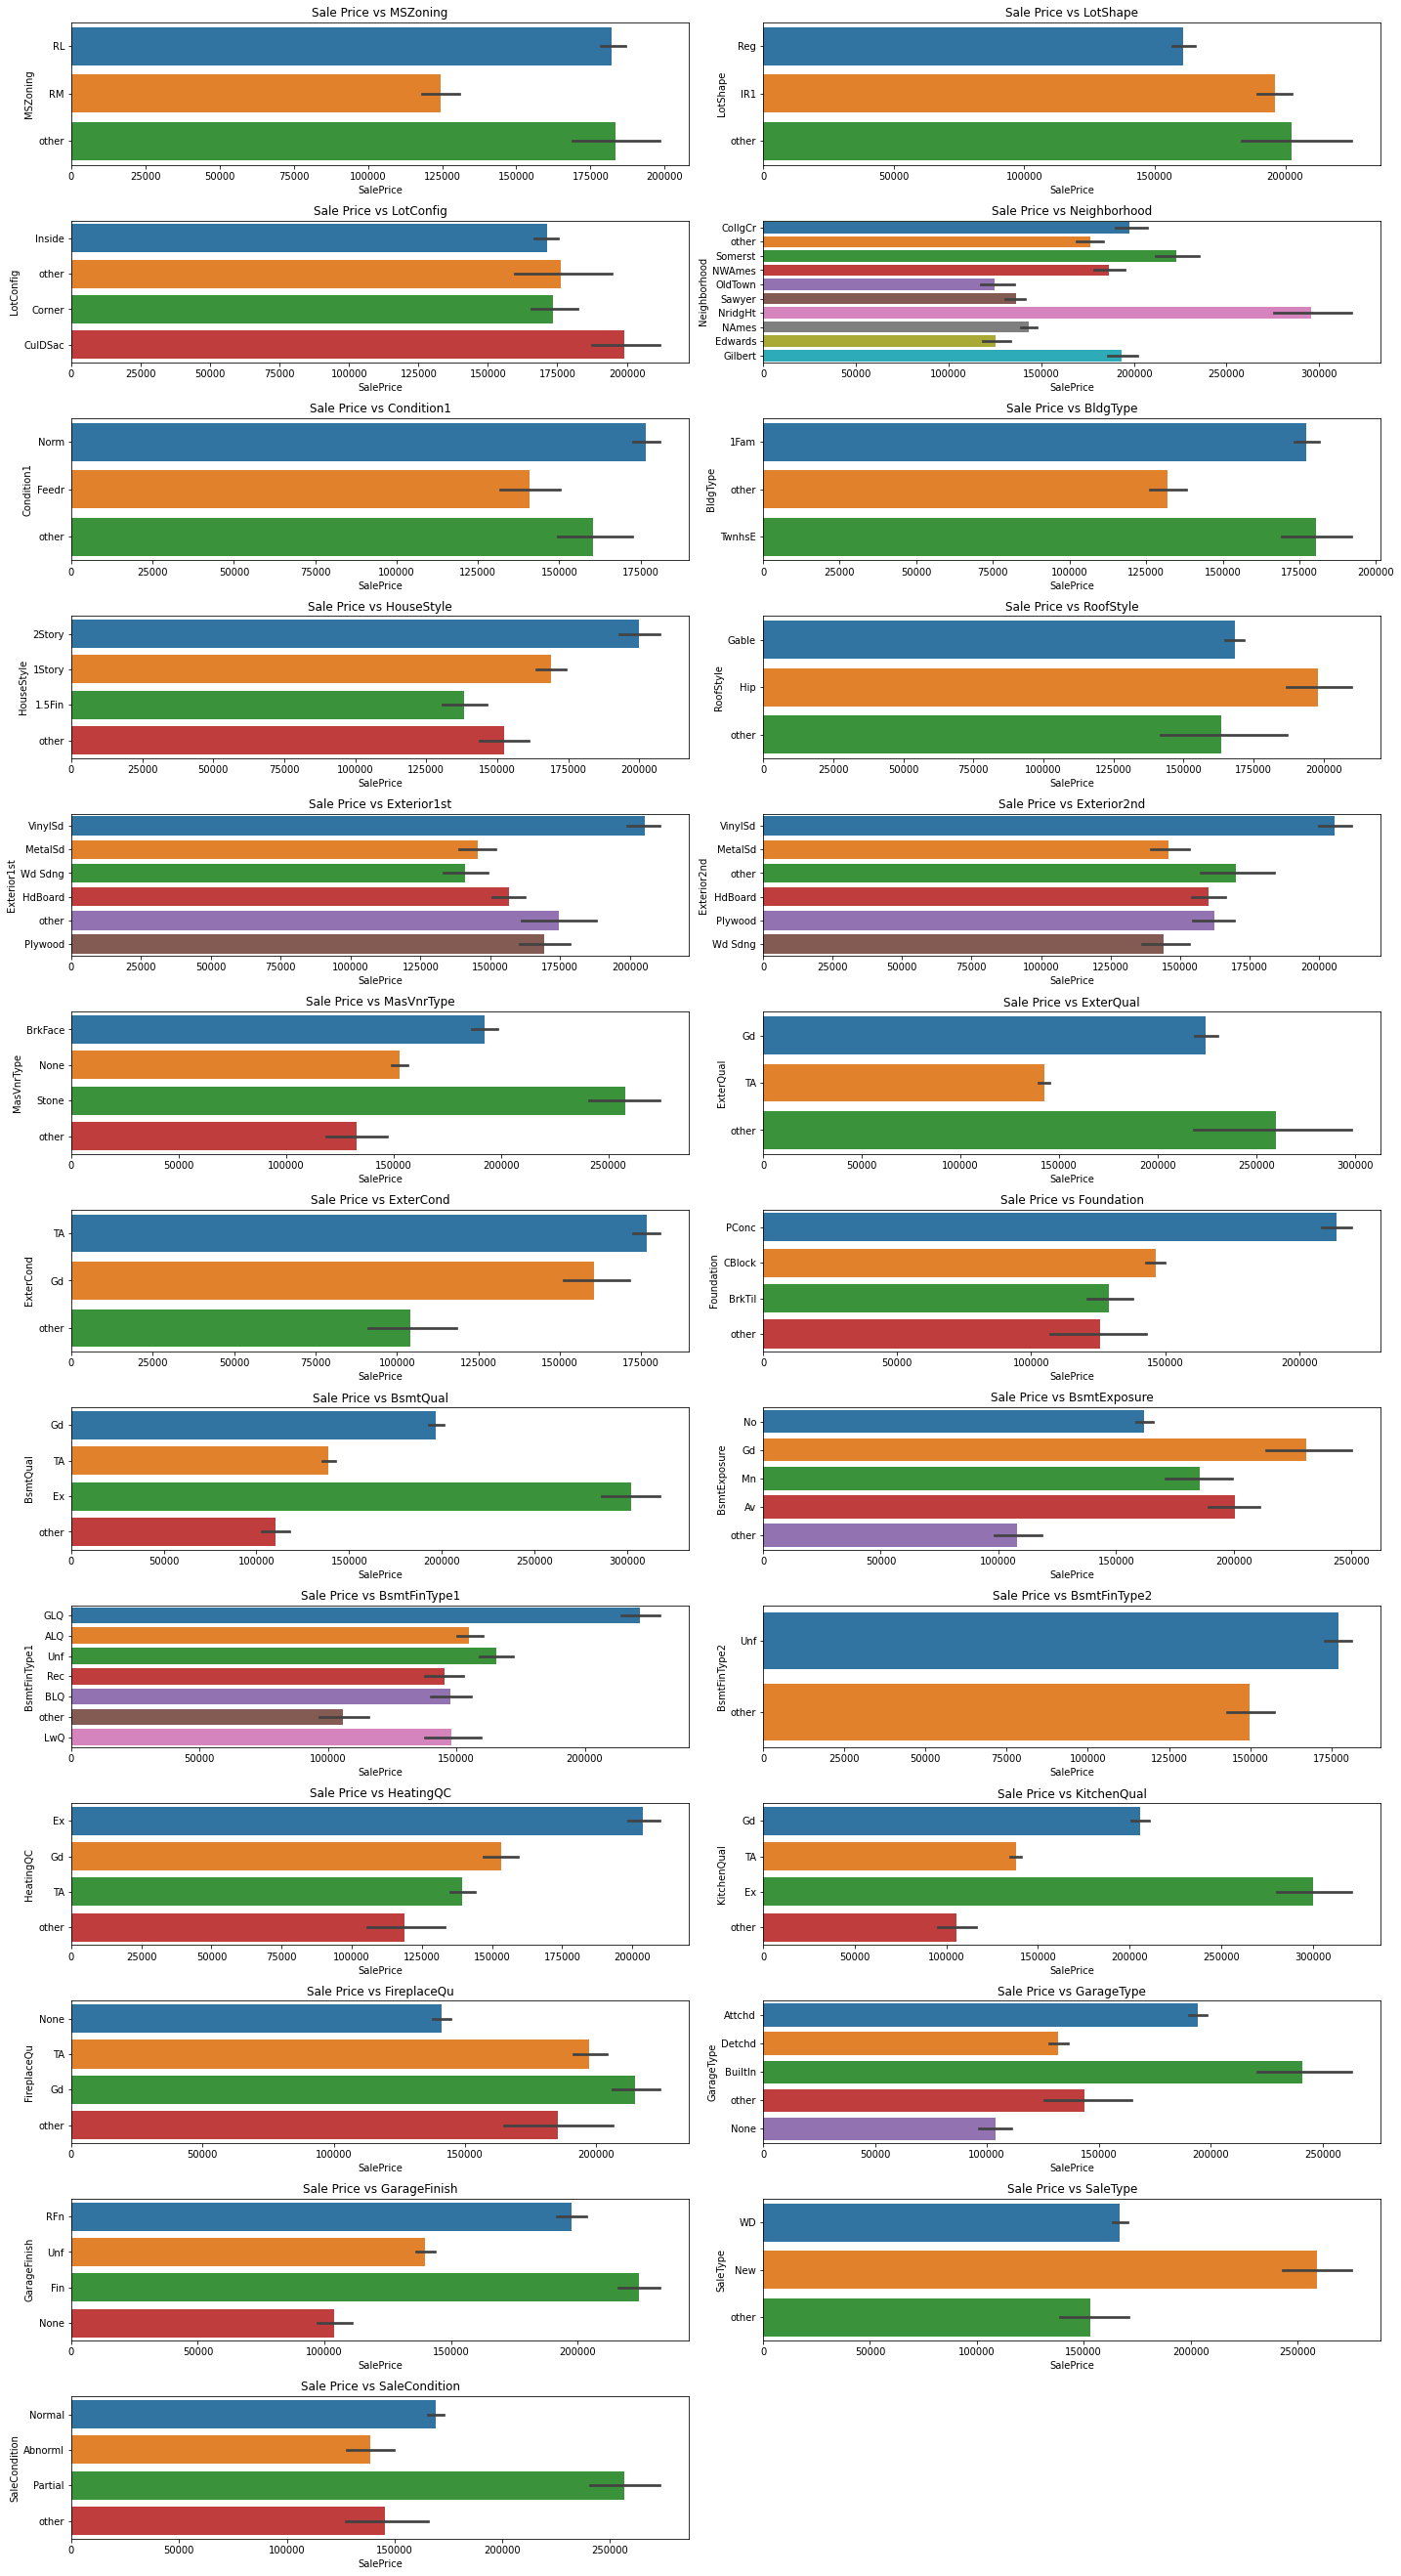

In [117]:
cols = ['MSZoning',
 'LotShape',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'SaleType',
 'SaleCondition']

rowCnt = len(cols)
colCnt = 2
subCnt = 1 # initialize plot number

plt.figure(figsize = (20,70))
for col in (cols):
    plt.subplot(rowCnt, colCnt, subCnt)
    plt.title('Sale Price vs '+ col)
    sns.barplot(housing['SalePrice'], housing[col])
   # plt.subplots_adjust(vspace = 2.5)
    plt.tight_layout(pad=1.0)
    subCnt = subCnt+1

###### Insights of each plots draw above:

###### 1. MSZoning
- Residential Low Density houses has sale price more than any other types of houses.

###### 2. LotShape
- Irregular shape houses has higher sale price than regular houses.  

###### 3. LotConfig
- Cul-de-sac lot houses has more sale price than any other type of houses.

###### 4. Neighborhood
- Northridge Heights physical location has highest sale price.

###### 5. Condition1
- Normal proximity houses has higher sale price than others.  

###### 6. BldgType
- single-family Detached houses has highest sale price.

###### 7. HouseStyle
- 2 storey houses has highest sale price.

###### 8. RoofStyle
- Hip roof houses has highest sale price.

###### 9. Exterior1st
- Vinyl Siding houses has highest sale price..

###### 10. Exterior2nd
- Vinyl Siding houses has highest sale price.

###### 11. MasVnrType
- Houses having stone Masonry veneer has highest sale price.

###### 12. ExterQual
- Houses having external material as good are the most expensive.  

###### 13. ExterCond
- Houses having external material as Average/Typical are the most expensive.  

###### 14. Foundation
- Houses with foundation Poured Contrete are the most expensive.

###### 15. BsmtQual
- Houses having basement quality as excellent are the most expensive.  

###### 16. BsmtExposure
- Houses having basement condition as good are the most expensive.

###### 17. BsmtFinType1
- Houses having basement finished area as Good Living Quarters are the most expensive.

###### 18. BsmtFinType2
- Houses having basement finished area as Unfurnished are the most expensive.

###### 19. HeatingQc
- Houses having heating quality as excellent are the most expensive.

###### 20. KitchenQual
- Houses having Kitchen quality as excellent are the most expensive.

###### 21. FirePlaceQc
- Houses having fireplace quality as good are the most expensive.

###### 22. GarageType
- Houses having built-in garage are the most expensive.

###### 23. GarageFinish
- Houses having finished garage work are the most expensive..

###### 24. SaleType
- new sale type houses are the most expensive.

###### 25. SaleCondition
- Partial type houses are the most expensive.


### Bivariate Analysis: Continuous - Continuous

<Figure size 720x360 with 0 Axes>

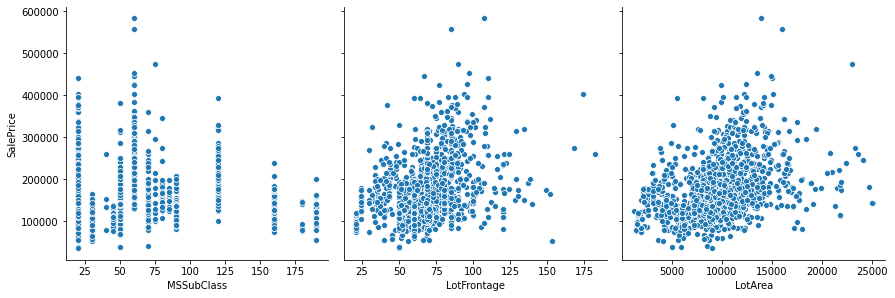

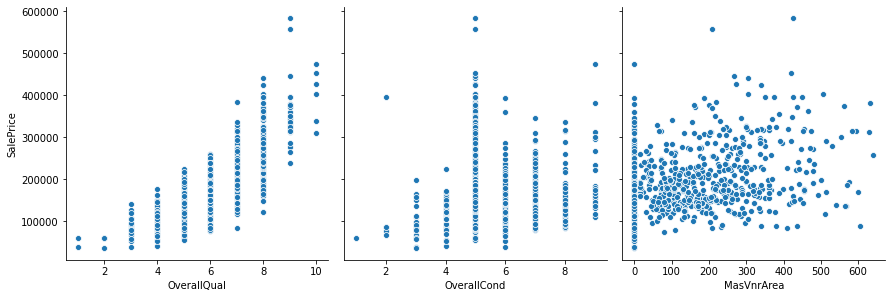

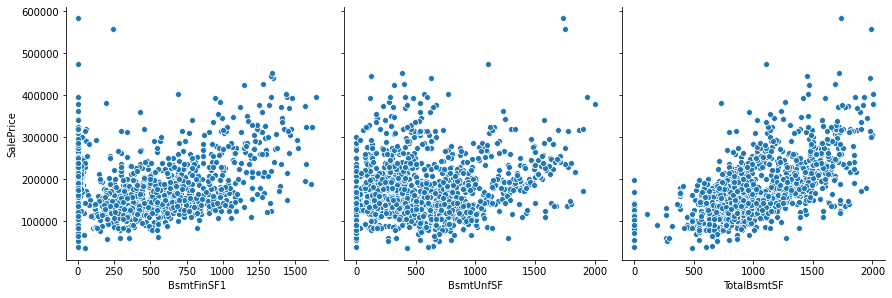

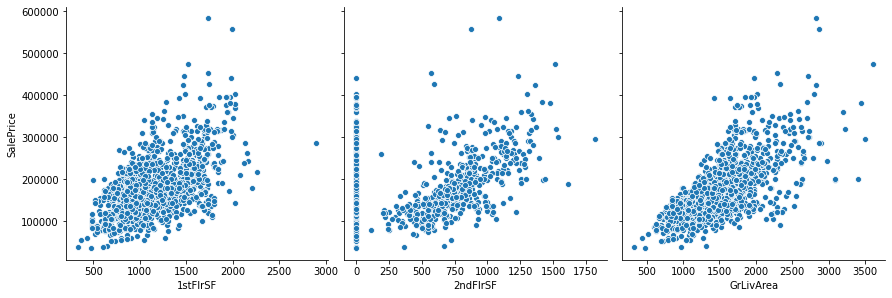

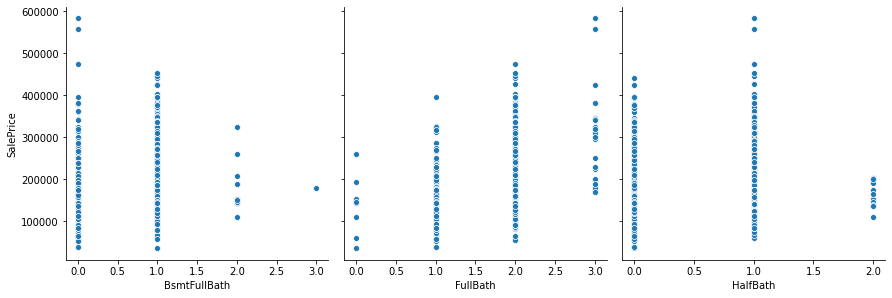

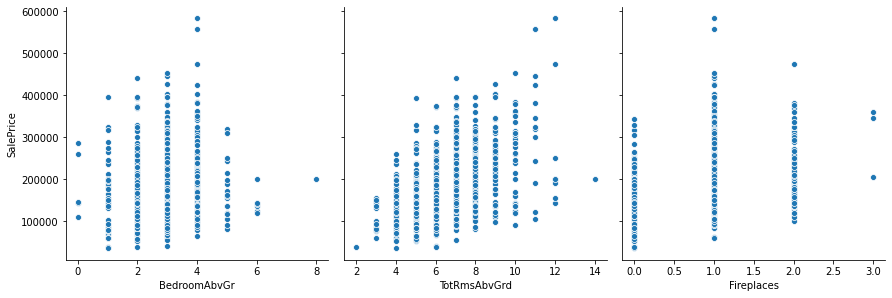

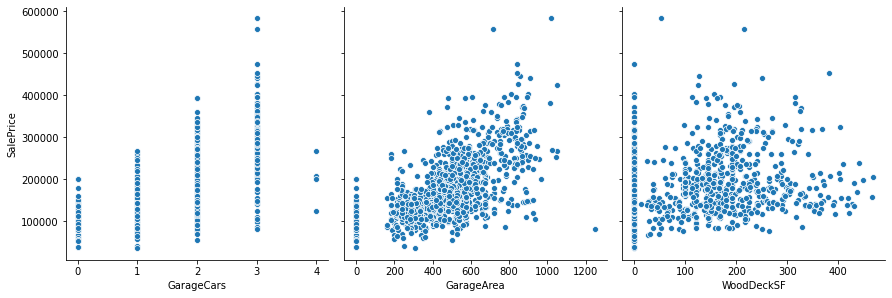

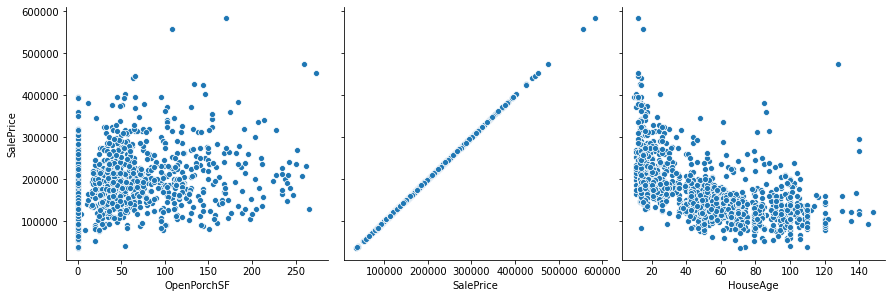

In [118]:
# Check the numerical values using pairplots

plt.figure(figsize=(10,5))
sns.pairplot(housing, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing, x_vars=['OpenPorchSF','SalePrice', 'HouseAge'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

###### Observations :
    - 1stFlrSF, GrLivArea seems to be showing correlation towards right
    - Rest of the variables are too scattered and hence can be understood during further analysis

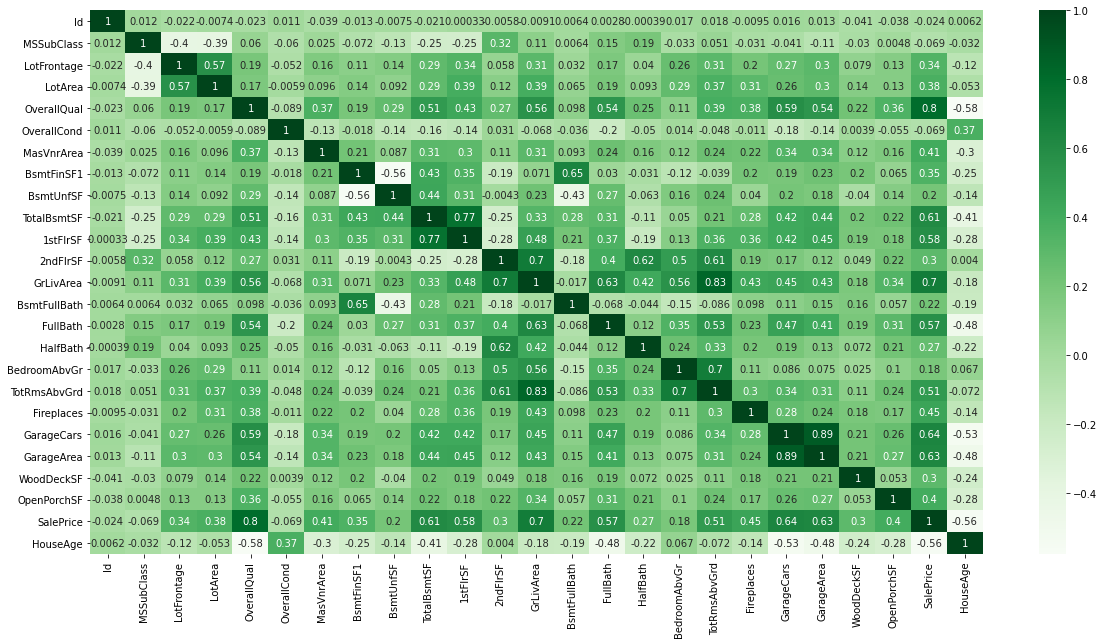

In [119]:
# Check the correlation of numerical columns

plt.figure(figsize = (20, 10))
sns.heatmap(housing.corr(), annot = True, cmap="Greens")
plt.show()

#### Removing following columns which shows high correlation
    - TotRmsAbvGrd and GrLivArea show 83%
    - Garage Area and Garage Cars show 89%

Hence dropping TotRmsAbvGrd and Garage Cars

In [120]:
# Removing the highly correlated variables

housing.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)

In [121]:
# Check the shape of the dataframe

housing.shape

(1358, 48)

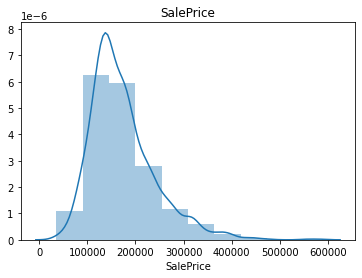

In [122]:
# Visualise the target variable -> SalePrice
plt.title('SalePrice')
sns.distplot(housing['SalePrice'], bins=10)
plt.show()

Sales price column is not normalized so we will transform this column

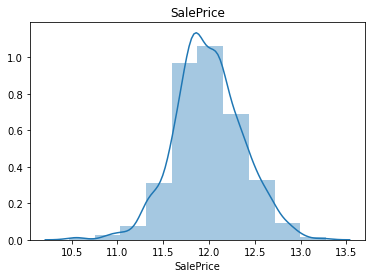

In [123]:
# Visualise the target variable -> SalePrice after transforming the sales price

housing['SalePrice'] = np.log1p(housing['SalePrice'])

plt.title('SalePrice')
sns.distplot(housing['SalePrice'], bins=10)
plt.show()

## Step 4: Data Preparation

  - Converting categorical data into numercal data 
  - Creating Dummies

### For categorical variables with multiple levels, creating dummy features (one-hot encoded)


In [124]:
# check al categorical variable which has 'other' as category
housing.columns[housing.isin(['other']).any()]

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
       'KitchenQual', 'FireplaceQu', 'GarageType', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [125]:
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable MsZoning'
ml = pd.get_dummies(housing['MSZoning'], prefix='MSZoning')
# Dropping the level called 'other' which represents other values
ml1 = ml.drop(['MSZoning_other'], 1)
#Adding the results to the master dataframe
housing = pd.concat([housing,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable LotShape'
ml = pd.get_dummies(housing['LotShape'], prefix='LotShape')
# Dropping the level called 'other' which represents other values
ml1 = ml.drop(['LotShape_other'], 1)
#Adding the results to the master dataframe
housing = pd.concat([housing,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable LotConfig'
ml = pd.get_dummies(housing['LotConfig'], prefix='LotConfig')
# Dropping the level called 'other' which represents other values
ml1 = ml.drop(['LotConfig_other'], 1)
#Adding the results to the master dataframe
housing = pd.concat([housing,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable Neighborhood'
ml = pd.get_dummies(housing['Neighborhood'], prefix='Neighborhood')
# Dropping the level called 'other' which represents other values
ml1 = ml.drop(['Neighborhood_other'], 1)
#Adding the results to the master dataframe
housing = pd.concat([housing,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable Condition1'
ml = pd.get_dummies(housing['Condition1'], prefix='Condition1')
# Dropping the level called 'other' which represents other values
ml1 = ml.drop(['Condition1_other'], 1)
#Adding the results to the master dataframe
housing = pd.concat([housing,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable BldgType'
ml = pd.get_dummies(housing['BldgType'], prefix='BldgType')
# Dropping the level called 'other' which represents other values
ml1 = ml.drop(['BldgType_other'], 1)
#Adding the results to the master dataframe
housing = pd.concat([housing,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable HouseStyle'
ml = pd.get_dummies(housing['HouseStyle'], prefix='HouseStyle')
# Dropping the level called 'other' which represents other values
ml1 = ml.drop(['HouseStyle_other'], 1)
#Adding the results to the master dataframe
housing = pd.concat([housing,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable RoofStyle'
ml = pd.get_dummies(housing['RoofStyle'], prefix='RoofStyle')
# Dropping the level called 'other' which represents other values
ml1 = ml.drop(['RoofStyle_other'], 1)
#Adding the results to the master dataframe
housing = pd.concat([housing,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable Exterior1st'
ml = pd.get_dummies(housing['Exterior1st'], prefix='Exterior1st')
# Dropping the level called 'other' which represents other values
ml1 = ml.drop(['Exterior1st_other'], 1)
#Adding the results to the master dataframe
housing = pd.concat([housing,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable Exterior2nd'
ml = pd.get_dummies(housing['Exterior2nd'], prefix='Exterior2nd')
# Dropping the level called 'other' which represents other values
ml1 = ml.drop(['Exterior2nd_other'], 1)
#Adding the results to the master dataframe
housing = pd.concat([housing,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable MasVnrType'
ml = pd.get_dummies(housing['MasVnrType'], prefix='MasVnrType')
# Dropping the level called 'other' which represents other values
ml1 = ml.drop(['MasVnrType_other'], 1)
#Adding the results to the master dataframe
housing = pd.concat([housing,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable ExterQual'
ml = pd.get_dummies(housing['ExterQual'], prefix='ExterQual')
# Dropping the level called 'other' which represents other values
ml1 = ml.drop(['ExterQual_other'], 1)
#Adding the results to the master dataframe
housing = pd.concat([housing,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable ExterCond'
ml = pd.get_dummies(housing['ExterCond'], prefix='ExterCond')
# Dropping the level called 'other' which represents other values
ml1 = ml.drop(['ExterCond_other'], 1)
#Adding the results to the master dataframe
housing = pd.concat([housing,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable Foundation'
ml = pd.get_dummies(housing['Foundation'], prefix='Foundation')
# Dropping the level called 'other' which represents other values
ml1 = ml.drop(['Foundation_other'], 1)
#Adding the results to the master dataframe
housing = pd.concat([housing,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable BsmtQual'
ml = pd.get_dummies(housing['BsmtQual'], prefix='BsmtQual')
# Dropping the level called 'other' which represents other values
ml1 = ml.drop(['BsmtQual_other'], 1)
#Adding the results to the master dataframe
housing = pd.concat([housing,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable BsmtExposure'
ml = pd.get_dummies(housing['BsmtExposure'], prefix='BsmtExposure')
# Dropping the level called 'other' which represents other values
ml1 = ml.drop(['BsmtExposure_other'], 1)
#Adding the results to the master dataframe
housing = pd.concat([housing,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable BsmtFinType1'
ml = pd.get_dummies(housing['BsmtFinType1'], prefix='BsmtFinType1')
# Dropping the level called 'other' which represents other values
ml1 = ml.drop(['BsmtFinType1_other'], 1)
#Adding the results to the master dataframe
housing = pd.concat([housing,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable BsmtFinType2'
ml = pd.get_dummies(housing['BsmtFinType2'], prefix='BsmtFinType2')
# Dropping the level called 'other' which represents other values
ml1 = ml.drop(['BsmtFinType2_other'], 1)
#Adding the results to the master dataframe
housing = pd.concat([housing,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable HeatingQC'
ml = pd.get_dummies(housing['HeatingQC'], prefix='HeatingQC')
# Dropping the level called 'other' which represents other values
ml1 = ml.drop(['HeatingQC_other'], 1)
#Adding the results to the master dataframe
housing = pd.concat([housing,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable KitchenQual'
ml = pd.get_dummies(housing['KitchenQual'], prefix='KitchenQual')
# Dropping the level called 'other' which represents other values
ml1 = ml.drop(['KitchenQual_other'], 1)
#Adding the results to the master dataframe
housing = pd.concat([housing,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable FireplaceQu'
ml = pd.get_dummies(housing['FireplaceQu'], prefix='FireplaceQu')
# Dropping the level called 'other' which represents other values
ml1 = ml.drop(['FireplaceQu_other'], 1)
#Adding the results to the master dataframe
housing = pd.concat([housing,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable GarageType'
ml = pd.get_dummies(housing['GarageType'], prefix='GarageType')
# Dropping the level called 'other' which represents other values
ml1 = ml.drop(['GarageType_other'], 1)
#Adding the results to the master dataframe
housing = pd.concat([housing,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable SaleType'
ml = pd.get_dummies(housing['SaleType'], prefix='SaleType')
# Dropping the level called 'other' which represents other values
ml1 = ml.drop(['SaleType_other'], 1)
#Adding the results to the master dataframe
housing = pd.concat([housing,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable SaleCondition'
ml = pd.get_dummies(housing['SaleCondition'], prefix='SaleCondition')
# Dropping the level called 'other' which represents other values
ml1 = ml.drop(['SaleCondition_other'], 1)
#Adding the results to the master dataframe
housing = pd.concat([housing,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable GarageFinish'
ml = pd.get_dummies(housing['GarageFinish'], prefix='GarageFinish')
# Dropping the level called 'None' which represents other values
ml1 = ml.drop(['GarageFinish_None'], 1)
#Adding the results to the master dataframe
housing = pd.concat([housing,ml1], axis=1)

In [126]:
#check the data again
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,...,GarageType_Detchd,GarageType_None,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,Norm,1Fam,...,0,0,0,1,0,1,0,0,1,0
1,2,20,RL,80.0,9600,Reg,other,other,Feedr,1Fam,...,0,0,0,1,0,1,0,0,1,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,Norm,1Fam,...,0,0,0,1,0,1,0,0,1,0
3,4,70,RL,60.0,9550,IR1,Corner,other,Norm,1Fam,...,1,0,0,1,1,0,0,0,0,1
4,5,60,RL,84.0,14260,IR1,other,other,Norm,1Fam,...,0,0,0,1,0,1,0,0,1,0


In [127]:
# drop the below columns as we now have new columns derived from these columns
# We can also drop the id column as it will not be used any more

housing = housing.drop(['Id','MSZoning','LotShape','LotConfig','Neighborhood','Condition1','BldgType','HouseStyle','RoofStyle','Exterior1st',
 'Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtExposure','BsmtFinType1','BsmtFinType2',
 'HeatingQC','KitchenQual','FireplaceQu','GarageType','GarageFinish','SaleType','SaleCondition'], axis=1)


housing.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageType_Detchd,GarageType_None,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,0,0,0,1,0,1,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,0,0,0,1,0,1,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,0,0,0,1,0,1,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,1,0,0,1,1,0,0,0,0,1
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,0,0,0,1,0,1,0,0,1,0


In [128]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358 entries, 0 to 1458
Columns: 102 entries, MSSubClass to GarageFinish_Unf
dtypes: float64(3), int64(19), uint8(80)
memory usage: 390.1 KB


All columns in the data set are now numeric

## Step 5: Train Test Split

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
# Creating a copy of this origial variable in case if needed later on
original_housing = housing.copy()
print(original_housing.shape)
print(housing.shape)

(1358, 102)
(1358, 102)


In [131]:
# Putting all feature variable to X

X = housing.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageType_Detchd,GarageType_None,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,0,0,0,1,0,1,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,0,0,0,1,0,1,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,0,0,0,1,0,1,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,1,0,0,1,1,0,0,0,0,1
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,0,0,0,1,0,1,0,0,1,0


In [132]:
# Putting response variable to y

y = housing['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

## Step 6: Feature Scaling

In [133]:
# scaling the features

from sklearn.preprocessing import scale

# storing column names in cols
# scaling (the dataframe is converted to a numpy array)

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'GarageType_Detchd', 'GarageType_None', 'SaleType_New', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_Normal',
       'SaleCondition_Partial', 'GarageFinish_Fin', 'GarageFinish_RFn',
       'GarageFinish_Unf'],
      dtype='object', length=101)

In [134]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## Step 7: Recursive feature elimination (RFE)¶

    Since there are around 101 features, we will use RFE to get the best 50 features out of the 101 features and
    use the new features for further analysis

In [135]:
# Running RFE with the output number of the variable equal to 50

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 50)            
rfe = rfe.fit(X_train, y_train)

In [136]:
# Assign the columns selected by RFE to cols

col = X_train.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

temp_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df

,Variable,rfe_support,rfe_ranking
0,LotArea,True,1
1,OverallQual,True,1
2,OverallCond,True,1
3,BsmtUnfSF,True,1
4,TotalBsmtSF,True,1
5,1stFlrSF,True,1
6,2ndFlrSF,True,1
7,GrLivArea,True,1
8,BsmtFullBath,True,1
9,GarageCars,True,1


In [137]:
# Assign the 50 columns to X_train_rfe

X_train_rfe = X_train[col]

In [138]:
# Associate the new 50 columns to X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

## Step 8: Model Building and Evaluation

## Ridge Regression

In [139]:
# list 0f alphas

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [140]:
# display the mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
17,5,-0.072611,-0.078563,1
16,4,-0.072551,-0.078563,2
15,3,-0.072487,-0.078567,3
18,6,-0.072663,-0.078569,4
14,2,-0.072413,-0.078574,5
19,7,-0.072710,-0.078574,6
20,8,-0.072756,-0.078581,7
13,1,-0.072323,-0.078585,8
12,0.9,-0.072313,-0.078586,9
21,9,-0.072799,-0.078587,10


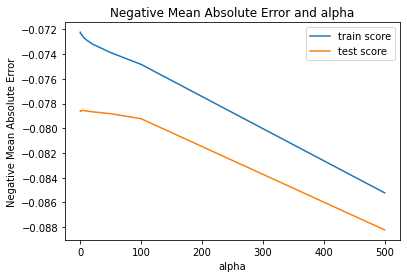

In [141]:
# plotting mean test and train scores with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [142]:
# get the best estimator for lambda

ridge_model_cv.best_estimator_

Ridge(alpha=5.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [143]:
# check the coefficient values with lambda = 5

alpha = 5
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.02461376,  0.07769207,  0.05922564, -0.02902427,  0.06809807,
        0.03301145,  0.04646715,  0.08794672,  0.01295562,  0.02662169,
       -0.06354848,  0.03028881, -0.01272451,  0.01243147,  0.02177442,
        0.01775295,  0.02261925,  0.01599002, -0.03739342, -0.01827117,
        0.02623871,  0.01379262, -0.0213061 , -0.01718222,  0.02392696,
        0.01214383,  0.01516085,  0.01457776, -0.01637333,  0.00074519,
       -0.0138984 , -0.02249913, -0.00464041, -0.00572675, -0.00726454,
       -0.00398161, -0.01329701, -0.01886814,  0.01079619,  0.0374151 ,
        0.02424915,  0.01841713,  0.01401117,  0.01267061, -0.01705895,
        0.10162859,  0.02631011, -0.06979015,  0.00876739,  0.00939012])

In [144]:
# Check the mean squared error

mean_squared_error(y_test, ridge.predict(X_test))

0.017349224347013206

In [145]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,LotArea,0.0246
1,OverallQual,0.0777
2,OverallCond,0.0592
3,BsmtUnfSF,-0.0290
4,TotalBsmtSF,0.0681
5,1stFlrSF,0.0330
6,2ndFlrSF,0.0465
7,GrLivArea,0.0879
8,BsmtFullBath,0.0130
9,GarageCars,0.0266


In [146]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'LotArea': 0.0246,
 'OverallQual': 0.0777,
 'OverallCond': 0.0592,
 'BsmtUnfSF': -0.029,
 'TotalBsmtSF': 0.0681,
 '1stFlrSF': 0.033,
 '2ndFlrSF': 0.0465,
 'GrLivArea': 0.0879,
 'BsmtFullBath': 0.013,
 'GarageCars': 0.0266,
 'HouseAge': -0.0635,
 'MSZoning_RL': 0.0303,
 'Neighborhood_Edwards': -0.0127,
 'Neighborhood_NridgHt': 0.0124,
 'Neighborhood_Somerst': 0.0218,
 'Condition1_Norm': 0.0178,
 'BldgType_1Fam': 0.0226,
 'BldgType_TwnhsE': 0.016,
 'Exterior1st_VinylSd': -0.0374,
 'Exterior1st_Wd Sdng': -0.0183,
 'Exterior2nd_VinylSd': 0.0262,
 'Exterior2nd_Wd Sdng': 0.0138,
 'ExterCond_Gd': -0.0213,
 'ExterCond_TA': -0.0172,
 'Foundation_PConc': 0.0239,
 'BsmtQual_Ex': 0.0121,
 'BsmtQual_Gd': 0.0152,
 'BsmtQual_TA': 0.0146,
 'BsmtExposure_Av': -0.0164,
 'BsmtExposure_Gd': 0.0007,
 'BsmtExposure_Mn': -0.0139,
 'BsmtExposure_No': -0.0225,
 'BsmtFinType1_ALQ': -0.0046,
 'BsmtFinType1_BLQ': -0.0057,
 'BsmtFinType1_GLQ': -0.0073,
 'BsmtFinType1_LwQ': -0.004,
 'BsmtFinType1_Rec': -0.0133,
 '

In [147]:
# Do an RFE to minimise the features to 15
X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_ridge, y_train)

In [148]:
# Method to get the coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(10)
temp1_df

,Features,rfe_support,rfe_ranking,Coefficient
12,SaleType_New,True,1,0.1016
5,GrLivArea,True,1,0.0879
1,OverallQual,True,1,0.0777
4,TotalBsmtSF,True,1,0.0681
2,OverallCond,True,1,0.0592
8,MSZoning_RL,True,1,0.0303
6,GarageCars,True,1,0.0266
13,SaleCondition_Normal,True,1,0.0263
10,Exterior2nd_VinylSd,True,1,0.0262
0,LotArea,True,1,0.0246


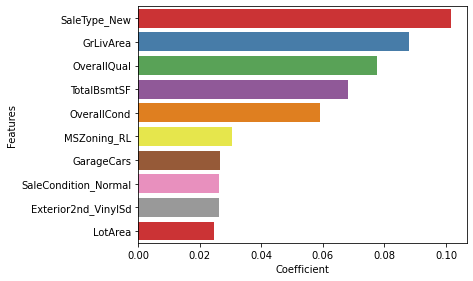

In [149]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp1_df)
plt.show()

The above graph displays the top 10 variables based on the Ridge Regression model that are significant in predicting the price of a house.

#### Lasso Regression

In [150]:
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    2.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [151]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
0,0.0001,-0.072373,-0.078751,1
1,0.0002,-0.072552,-0.078871,2
6,0.002,-0.074427,-0.078891,3
2,0.0003,-0.072754,-0.078950,4
3,0.0004,-0.072966,-0.078966,5
4,0.0005,-0.073131,-0.078999,6
5,0.001,-0.073879,-0.079092,7
7,0.003,-0.074910,-0.079250,8
8,0.004,-0.075592,-0.079929,9
9,0.005,-0.076415,-0.080676,10


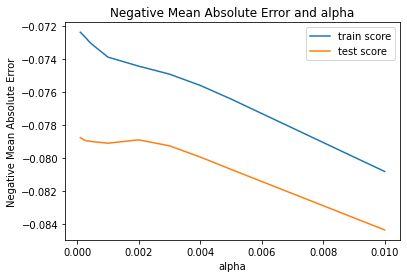

In [152]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [153]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [154]:
# check the coefficient values with lambda = 0.0001

alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 0.02570363,  0.07722075,  0.06039567, -0.02992034,  0.07006467,
        0.01771866,  0.02919325,  0.10782722,  0.01343513,  0.02569993,
       -0.06648386,  0.03010281, -0.01265813,  0.01225002,  0.02164743,
        0.01791213,  0.02230208,  0.01625385, -0.03970418, -0.01748041,
        0.02839113,  0.01382806, -0.02176921, -0.01740978,  0.02354296,
        0.00945062,  0.01123634,  0.01177308, -0.02084681, -0.00185207,
       -0.01719015, -0.02831121,  0.        , -0.00166238, -0.00098946,
       -0.0012204 , -0.00943404, -0.01182414,  0.0109929 ,  0.03779646,
        0.02451561,  0.01840019,  0.0148074 ,  0.01281738, -0.01763652,
        0.15611657,  0.0260069 , -0.12465567,  0.00787029,  0.00866098])

In [155]:
# Check the mean squared error

mean_squared_error(y_test, lasso.predict(X_test))

0.018440163959972083

In [156]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,LotArea,0.0257
1,OverallQual,0.0772
2,OverallCond,0.0604
3,BsmtUnfSF,-0.0299
4,TotalBsmtSF,0.0701
5,1stFlrSF,0.0177
6,2ndFlrSF,0.0292
7,GrLivArea,0.1078
8,BsmtFullBath,0.0134
9,GarageCars,0.0257


In [157]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'LotArea': 0.025703628371742282,
 'OverallQual': 0.07722074996249348,
 'OverallCond': 0.06039566840015336,
 'BsmtUnfSF': -0.029920341384138384,
 'TotalBsmtSF': 0.07006467415766883,
 '1stFlrSF': 0.01771866424154083,
 '2ndFlrSF': 0.029193247137128647,
 'GrLivArea': 0.10782722206165095,
 'BsmtFullBath': 0.013435129948123294,
 'GarageCars': 0.025699925475937087,
 'HouseAge': -0.06648385663642357,
 'MSZoning_RL': 0.030102814140062398,
 'Neighborhood_Edwards': -0.012658128229386792,
 'Neighborhood_NridgHt': 0.012250023334669324,
 'Neighborhood_Somerst': 0.021647427981533598,
 'Condition1_Norm': 0.017912130835411974,
 'BldgType_1Fam': 0.0223020817391984,
 'BldgType_TwnhsE': 0.01625385081012402,
 'Exterior1st_VinylSd': -0.03970417562732055,
 'Exterior1st_Wd Sdng': -0.01748041391987095,
 'Exterior2nd_VinylSd': 0.028391126548089018,
 'Exterior2nd_Wd Sdng': 0.013828058760388794,
 'ExterCond_Gd': -0.021769214657970725,
 'ExterCond_TA': -0.017409782527886733,
 'Foundation_PConc': 0.023542960682493

In [158]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [159]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

,Features,rfe_support,rfe_ranking,Coefficient
12,SaleType_New,True,1,0.156117
5,GrLivArea,True,1,0.107827
1,OverallQual,True,1,0.077221
4,TotalBsmtSF,True,1,0.070065
2,OverallCond,True,1,0.060396
8,MSZoning_RL,True,1,0.030103
10,Exterior2nd_VinylSd,True,1,0.028391
13,SaleCondition_Normal,True,1,0.026007
0,LotArea,True,1,0.025704
6,GarageCars,True,1,0.025700


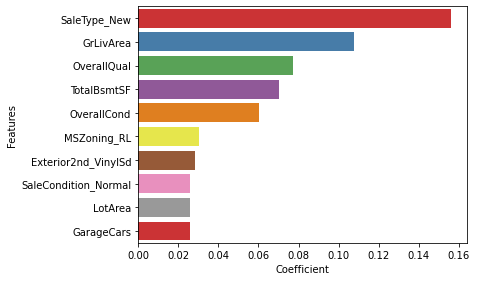

In [160]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp2_df)
plt.show()

The above graph displays the top 10 variables based on the Lasso Regression model that are significant in predicting the price of a house.  

## Conclusion: 

- The optimal lambda value in case of Ridge and Lasso is as below:
    - Ridge - 5
    - Lasso - 0.0001
    
- The Mean Squared error in case of Ridge and Lasso are:
    - Ridge - 0.017349
    - Lasso - 0.018440

- The Mean Squared Error of Lasso is slightly higher than that of Ridge

- But, since Lasso helps in feature reduction (as the coefficient value of one of the feature became 0), Lasso has a 
  better edge over Ridge.
  
- Hence based on Lasso, the factors that generally affect the price are the SaleType(whether it's newly constructed or on deed), Above ground Living area square feet, Overall quality and condition of the house, Total square feet of basement area and overall condition of the house
    
Therefore, the variables predicted by Lasso in the above bar chart as significant variables for predicting the 
price of a house.